SUMMARY

1. Capomulin was far and away the most effective at reducing tumor volume, in fact it was the only treatment besides Ramicane (not graphed) which actually reduced tumor volume.  The other drugs were effectively the same as the placebo. Ketapril was effectively the worst medication for reducing tumor volume.

2. At suppressing metastatic spread during treatment, Ramicane and Capomulin again were the most effective drugs.  Infubinol was somewhat effective, but Ketabpril had virtually the same effectiveness as the placebo.

3.  Mouse survival rates were highest with Capomulin at 84% at the end of the treatment period.  Ramicane was in a close 2nd.  Ketapril was effectively the same as the Placebo but Infubinol has worse.  Profriva (not graphed) had the worst.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
clinicaltrial_data = pd.read_csv("clinicaltrial_data.csv")


In [3]:
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")



In [4]:
merged_df = pd.merge(clinicaltrial_data, mouse_drug_data, on="Mouse ID")

In [5]:
#get the mean of each trial as a function of drug and timepoint
av_tumor_volumes_per_drug = merged_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# get the stardard error of each mean
standard_error = merged_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Change the table of everage tumor growths per drug into a DF
av_tumor_volumes_per_drug_df = pd.DataFrame(av_tumor_volumes_per_drug)
av_tumor_volumes_per_drug_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
# reset indexes
av_volumes_per_drug__reset_df = av_tumor_volumes_per_drug_df.reset_index()


In [7]:
# Create pivot table
drugs_pivot_df = av_volumes_per_drug__reset_df.pivot(index="Timepoint", columns='Drug', values='Tumor Volume (mm3)')
drugs_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

In [8]:
#Make a plot for each drug as a function of Timepoint

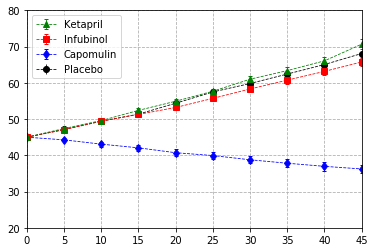

In [9]:
# plot the Placebo
x = drugs_pivot_df.index
y = drugs_pivot_df["Placebo"]
yerr = standard_error["Placebo"]
placebo_volume_plot_sem = plt.errorbar(x, y, yerr=yerr, color="black", ecolor="black",marker="o", linestyle="dashed", linewidth=0.8)


# plot Capomulin
x = drugs_pivot_df.index
y = drugs_pivot_df["Capomulin"]
yerr = standard_error["Capomulin"]
capomulin_volume_plot_sem = plt.errorbar(x, y, yerr=yerr, color="b", ecolor="b",marker="d", linestyle="dashed", linewidth=0.8, capsize=2)


# plot Infubinol
x = drugs_pivot_df.index
y = drugs_pivot_df["Infubinol"]
yerr = standard_error["Infubinol"]
infubinol_volume_plot_sem = plt.errorbar(x, y, yerr=yerr, color="r", ecolor="r", marker="s", linestyle="dashed", linewidth=0.8, capsize=2)


# plot Ketapril
x = drugs_pivot_df.index
y = drugs_pivot_df["Ketapril"]
yerr = standard_error["Ketapril"]
ketapril_volume_plot_sem = plt.errorbar(x, y, yerr=yerr, color="g", ecolor="g", marker="^", linestyle="dashed", linewidth=0.8, capsize=2)


#set limits
plt.ylim(20, 80)
plt.xlim(0, 45)
# Create a legend for our chart
plt.legend(handles=[ketapril_volume_plot_sem,infubinol_volume_plot_sem,capomulin_volume_plot_sem, placebo_volume_plot_sem], loc="best")

plt.grid(b=True, linestyle="dashed")
plt.show()

# Creating a scatter plot that shows how the number of [metastatic] sites changes over time for each treatment.

In [10]:
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [11]:
# Find the average number of metastatic sites as a function of Timepoint and treatment
av_sites_per_drug = merged_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
av_sites_per_drug_df = pd.DataFrame(av_sites_per_drug)
av_sites_per_drug_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Calculate standard error
av_sites_sem = merged_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
av_sites_sem_df = pd.DataFrame(av_sites_sem)
av_sites_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# reset indexes
av_sites_per_drug_reset_df = av_sites_per_drug_df.reset_index()

In [14]:
# Create pivot table
sites_pivot_df = av_sites_per_drug_reset_df.pivot(index="Timepoint", columns='Drug', values='Metastatic Sites')
sites_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


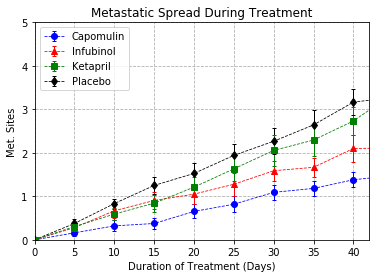

In [15]:
# plot the Placebo
x = sites_pivot_df.index
y = sites_pivot_df["Placebo"]
yerr = av_sites_sem["Placebo"]
placebo_sem_sites_plot = plt.errorbar(x, y, yerr=yerr, marker="d",color="black", ecolor="black",elinewidth=1, linestyle="dashed", linewidth=0.8, capsize=2)


# plot the average sites for Capomulin
x = sites_pivot_df.index
y = sites_pivot_df["Capomulin"]
yerr = av_sites_sem["Capomulin"]
capomulin_sem_sites_plot = plt.errorbar(x, y, yerr=yerr, color="b", ecolor="b", marker="o",elinewidth=1, linestyle="dashed", linewidth=0.8, capsize=2)


# plot the average sites for Infubinol
x = sites_pivot_df.index
y = sites_pivot_df["Infubinol"]
yerr = av_sites_sem["Infubinol"]
infubinol_sem_sites_plot = plt.errorbar(x, y, yerr=yerr, color="r", ecolor="r",marker="^",elinewidth=1 ,linestyle="dashed", linewidth=0.8, capsize=2)


# plot the average sites for Ketapril
x = sites_pivot_df.index
y = sites_pivot_df["Ketapril"]
yerr = av_sites_sem["Ketapril"]
ketapril_sem_sites_plot = plt.errorbar(x, y, yerr=yerr, color="g", ecolor="g",marker="s",elinewidth=1, linestyle="dashed", linewidth=0.8, capsize=2)


# plot the legend
plt.legend(handles=[capomulin_sem_sites_plot,infubinol_sem_sites_plot,ketapril_sem_sites_plot,placebo_sem_sites_plot], loc="best")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Duration of Treatment (Days)")
plt.ylabel("Met. Sites")
plt.grid(b=True, linestyle="dashed")
plt.ylim(0, 5)
plt.xlim(0, 42)
plt.show()

Capomulin was the most effective drug at suppressing metastatic spread during treatment.  Infubinol was somewhat effective, but Ketabpril was not much more effective than the placebo.

# Survival Rates

In [16]:
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [20]:
# caluculate the number of mice as a function of teh drug and timepoints
mouse_count = merged_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
mouse_count_df = pd.DataFrame(mouse_count)

# Rename Mouse ID to Mouse Count
mouse_count_df_renamed = mouse_count_df.rename(columns={"Mouse ID": "Mouse Counts"})
mouse_count_df_renamed.head()


Mouse Counts
Drug      Timepoint              
Capomulin 0                    25
          5                    25
          10                   25
          15                   24
          20                   23

In [21]:
# reset indexes
mouse_count_df_reset = mouse_count_df_renamed.reset_index()

In [22]:
# Pivot table
mouse_count_pivot_df = mouse_count_df_reset.pivot(index="Timepoint", columns='Drug', values='Mouse Counts')
mouse_count_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [23]:
# Calculate survival percentages at the timepoints

Capomulin_percents = 100 * mouse_count_pivot_df["Capomulin"]/mouse_count_pivot_df["Capomulin"].iloc[0]
Capomulin_percents

placebo_percent = 100 * mouse_count_pivot_df["Placebo"]/mouse_count_pivot_df["Placebo"].iloc[0] 

propriva_percent = 100 * mouse_count_pivot_df["Propriva"] / mouse_count_pivot_df["Propriva"].iloc[0]

Infubinol_percent = 100 * mouse_count_pivot_df["Infubinol"] / mouse_count_pivot_df["Infubinol"].iloc[0]

Ketapril_percent = 100 * mouse_count_pivot_df["Ketapril"] / mouse_count_pivot_df["Ketapril"].iloc[0]


In [24]:
survival_rates_df = pd.DataFrame({"Capomulin": Capomulin_percents, "Placebo": placebo_percent, "Infubinol": Infubinol_percent, "Ketapril": Ketapril_percent})
survival_rates_df

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


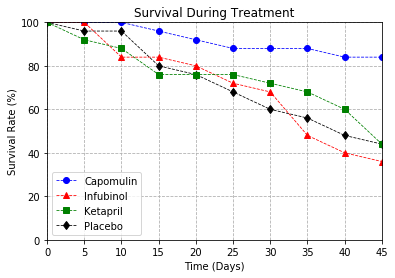

In [25]:
# plot the Placebo, no yerr since there is no error
x = survival_rates_df.index
y = survival_rates_df["Placebo"]
placebo_survival_plot = plt.errorbar(x, y, marker="d",linestyle="dashed", linewidth=0.8, color="black", ecolor="black")

# plot Capomulin
x = survival_rates_df.index
y = survival_rates_df["Capomulin"]
capomulin_survival_plot = plt.errorbar(x, y, marker="o",color="b", ecolor="b",linestyle="dashed", linewidth=0.8)


# plot Infubinol
x = survival_rates_df.index
y = survival_rates_df["Infubinol"]
infubinol_survival_plot = plt.errorbar(x, y, marker="^", color="r", ecolor="r", linestyle="dashed", linewidth=0.8)

# plot survival rates for Ketapril
x = survival_rates_df.index
y = survival_rates_df["Ketapril"]
ketapril_survival_plot = plt.errorbar(x, y, marker="s", color="g", ecolor="g", linestyle="dashed", linewidth=0.8)

plt.legend(handles=[capomulin_survival_plot,infubinol_survival_plot,ketapril_survival_plot, placebo_survival_plot], loc="best")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(b=True, linestyle = "dashed")
plt.ylim(0, 100)
plt.xlim(0, 45)
plt.show()

## Summary Bar Graph

In [26]:
drugs_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [27]:
# Calculate percent change of Capomulin
Capomulin_change = round(100 * ((drugs_pivot_df.iloc[9,0] - drugs_pivot_df.iloc[0,0]) / drugs_pivot_df.iloc[0,0]))
print(Capomulin_change)

# Infubinol percent change
Infubinol_change = round(100 * ((drugs_pivot_df.iloc[9,2] - drugs_pivot_df.iloc[0,2]) / drugs_pivot_df.iloc[0,0]))
print(Infubinol_change)

# Ketapril percent change
Ketapril_change = round(100 * ((drugs_pivot_df.iloc[9,3] - drugs_pivot_df.iloc[0,3]) / drugs_pivot_df.iloc[0,0]))
print(Ketapril_change)

#Palcebo change
Placebo_change = round(100 * ((drugs_pivot_df.iloc[9,5] - drugs_pivot_df.iloc[0,5]) / drugs_pivot_df.iloc[0,0]))
print(Placebo_change)

-19.0
46.0
57.0
51.0


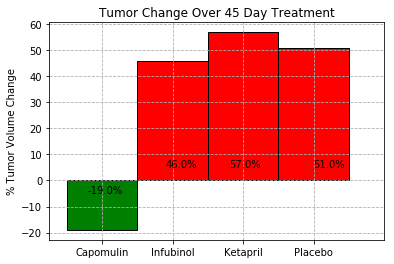

In [30]:
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

percent_changes = [Capomulin_change, Infubinol_change , Ketapril_change, Placebo_change]
x_axis = np.arange(len(drugs))

percent_changes = np.array(percent_changes)
percent_changes[percent_changes<0] = [Capomulin_change]

percent_changes[percent_changes>=0] = [Infubinol_change , Ketapril_change, Placebo_change]

plt1 = plt.bar(x_axis[0], percent_changes[percent_changes<0], color="g", align="center", width=1, edgecolor="black")
plt2 = plt.bar(x_axis[1:], percent_changes[percent_changes>=0], color="r", align="center",width=1, edgecolor="black")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis))
# plt.xlim(len(x_axis1), len(x_axis2))

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.text(-.2, -5 , "{}%".format(Capomulin_change))
plt.text(0.9, 5, "{}%".format(Infubinol_change))
plt.text(1.8, 5, "{}%".format(Ketapril_change))
plt.text(3, 5, "{}%".format(Placebo_change))
plt.grid(b=True, linestyle="dashed")
plt.show()


### or this way

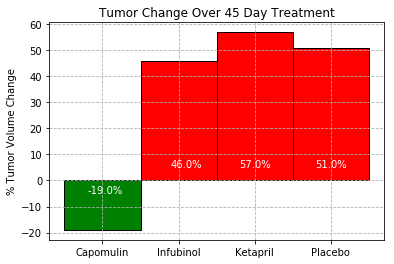

In [31]:
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

percent_changes = [Capomulin_change, Infubinol_change , Ketapril_change, Placebo_change]
colors = ["g", "r", "r", "r"]
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)

plt1 = plt.bar(x_axis, percent_changes, color= colors, align="center", width=1, edgecolor="black", linewidth=1)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.text(-.2, -5 , "{}%".format(Capomulin_change), color = "w")
plt.text(0.9, 5, "{}%".format(Infubinol_change), color="w")
plt.text(1.8, 5, "{}%".format(Ketapril_change), color="w")
plt.text(2.8, 5, "{}%".format(Placebo_change), color="w")
plt.grid(b=True, linestyle='dashed')
plt.show()